Python for Bioinformatics, Practical Classes 3

<h3> Biological databases

Modules and tools used during the next examples and exercises:
    
- urllib (working with URLs)
- lxml (HTML and XML processing)

NCBI Esearch = searching the NCBI databases

NCBI Efetch = downloading record from NCBI databases (usually in XML format)

<h4> | PDB database |

In [20]:
from urllib.request import urlopen #module for URL processing

def downloadPDB(pdbId):
    PDB_URL = f'http://www.rcsb.org/pdb/files/{pdbId}.pdb'   
    response = urlopen(PDB_URL)            #open URL 
    data = response.read().decode('utf-8') #read the content and use utf-8 encoding
    return data.split("\n")

In [99]:
t = downloadPDB("1X1R")
for elem in t:
    print(elem)

HEADER    SIGNALING PROTEIN                       12-APR-05   1X1R              
TITLE     CRYSTAL STRUCTURE OF M-RAS IN COMPLEX WITH GDP                        
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: RAS-RELATED PROTEIN M-RAS;                                 
COMPND   3 CHAIN: A;                                                            
COMPND   4 FRAGMENT: RESIDUES 1-178;                                            
COMPND   5 SYNONYM: RAS-RELATED PROTEIN R-RAS3, MUSCLE AND                      
COMPND   6 MICROSPIKES RAS, X-RAS, GTPASE;                                      
COMPND   7 ENGINEERED: YES                                                      
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: MUS MUSCULUS;                                   
SOURCE   3 ORGANISM_COMMON: HOUSE MOUSE;                                        
SOURCE   4 ORGANISM_TAXID: 1

<h4> Exercise1: Write a function that takes PDB ID as argument and saves into the file all lines which start with "ATOM" and "HETATM". What is the number of CA atoms in "1X1R"?

<h4> | PubMed | - searching by ID


In [24]:
from urllib.request import urlopen

PMID = '36335814'

baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query = f"db=pubmed&id={PMID}&format=xml"    
url = baseurl+query #concatenation of efetch and our query


f = urlopen(url) #open url
resultxml = f.read() #read the content

In [26]:
print(resultxml) #how the result looks like, compare with https://pubmed.ncbi.nlm.nih.gov/36335814/

b'<?xml version="1.0" ?>\n<!DOCTYPE PubmedArticleSet PUBLIC "-//NLM//DTD PubMedArticle, 1st January 2023//EN" "https://dtd.nlm.nih.gov/ncbi/pubmed/out/pubmed_230101.dtd">\n<PubmedArticleSet>\n<PubmedArticle><MedlineCitation Status="MEDLINE" Owner="NLM" IndexingMethod="Automated"><PMID Version="1">36335814</PMID><DateCompleted><Year>2022</Year><Month>12</Month><Day>06</Day></DateCompleted><DateRevised><Year>2022</Year><Month>12</Month><Day>25</Day></DateRevised><Article PubModel="Print-Electronic"><Journal><ISSN IssnType="Electronic">1879-0534</ISSN><JournalIssue CitedMedium="Internet"><Volume>151</Volume><Issue>Pt A</Issue><PubDate><Year>2022</Year><Month>Dec</Month></PubDate></JournalIssue><Title>Computers in biology and medicine</Title><ISOAbbreviation>Comput Biol Med</ISOAbbreviation></Journal><ArticleTitle>Multifarious aspects of the chaos game representation and its applications in biological sequence analysis.</ArticleTitle><Pagination><StartPage>106243</StartPage><MedlinePgn>106

In [27]:
from lxml import etree #external library for XML files processing

xml = etree.XML(resultxml) 
tags = list({elem.tag for elem in xml.iter()})
print(tags) #available tags

['AuthorList', 'PubmedArticleSet', 'Affiliation', 'MedlineJournalInfo', 'Article', 'Year', 'MedlinePgn', 'Hour', 'RegistryNumber', 'AbstractText', 'DateCompleted', 'Language', 'Issue', 'PubmedData', 'ISOAbbreviation', 'DescriptorName', 'AffiliationInfo', 'ISSN', 'MeshHeadingList', 'ELocationID', 'CitationSubset', 'CopyrightInformation', 'PubDate', 'PublicationType', 'Day', 'DateRevised', 'ForeName', 'JournalIssue', 'QualifierName', 'ArticleId', 'Abstract', 'Journal', 'NameOfSubstance', 'Volume', 'Minute', 'LastName', 'Keyword', 'NlmUniqueID', 'ISSNLinking', 'PMID', 'ArticleDate', 'PubMedPubDate', 'Title', 'Author', 'StartPage', 'ChemicalList', 'Month', 'History', 'Initials', 'PubmedArticle', 'Chemical', 'MeshHeading', 'MedlineCitation', 'Country', 'PublicationTypeList', 'ArticleIdList', 'KeywordList', 'ArticleTitle', 'Pagination', 'PublicationStatus', 'MedlineTA']


In [28]:
resultelements= xml.xpath("//LastName") 

for element in resultelements:
    print([element.text])

['Kania']
['Sarapata']


In [29]:
resultelements= xml.xpath("//ArticleTitle") 

for element in resultelements:
    print([element.text])

['Multifarious aspects of the chaos game representation and its applications in biological sequence analysis.']


In [30]:
resultelements= xml.xpath("//AbstractText") 

for element in resultelements:
    print([element.text])

['Chaos game representation (CGR) has been successfully applied in bioinformatics for over 30 years. Since then, many further extensions were announced. Numerical encoding of biological sequences is especially convenient in the visualisation process, free-alignment methods and input preparation for machine learning techniques. The development and applications of CGR have embraced mainly linear nucleotide sequences. However, there were also some attempts to create a representation of proteins. The latter need to be more sophisticated, as arbitrary coordinates for amino acids do not reflect their properties which is crucial during the encoding process. In this paper, the authors summarised various variations of CGRs and their limitations. We began by studying the PROSITE motifs and showed the immense number of amino acid properties employed by different proteins. To this aim, we harnessed the Principal Component Analysis (PCA) and studied the relation between explained variance and the n

<h4> Exercise2: For a given paper (chosen by yourself) save its abstract into a file (from PubMed database).

<h4> | PubMed | - searching by author

In [31]:
from urllib.request import urlopen
from urllib.parse import urlencode 
from lxml import etree  

author_name = "Adrian Kania"

base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
query = urlencode({"db": "pubmed", "term": author_name+"[author]", "retmax": 5})  #db = database
url = base_url + query

response = urlopen(url)
resultxml = response.read()
xml = etree.XML(resultxml)

In [32]:
tags = list({elem.tag for elem in xml.iter()})

print(tags)

['From', 'Translation', 'To', 'IdList', 'RetStart', 'RetMax', 'Count', 'Id', 'TranslationSet', 'eSearchResult', 'QueryTranslation']


In [33]:
resultelements = xml.xpath("//Id") #all tags for ID
for elem in resultelements:
    print([elem.text])

['36335814']
['35398336']
['34563550']
['33759532']
['33713823']


<h4> | Nucleotide |


In [34]:
from urllib.request import urlopen
from lxml import etree

ID = 'NM_204410.1'
baseurl= "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query= f"db=nucleotide&id={ID}&format=xml"
url= baseurl+query

f = urlopen(url) 
resultxml= f.read() 
xml= etree.XML(resultxml) 

In [35]:
print(resultxml)

b'<?xml version="1.0" encoding="UTF-8"  ?>\n<!DOCTYPE GBSet PUBLIC "-//NCBI//NCBI GBSeq/EN" "https://www.ncbi.nlm.nih.gov/dtd/NCBI_GBSeq.dtd">\n<GBSet>\n  <GBSeq>\n\n    <GBSeq_locus>NM_204410</GBSeq_locus>\n    <GBSeq_length>1009</GBSeq_length>\n    <GBSeq_strandedness>single</GBSeq_strandedness>\n    <GBSeq_moltype>mRNA</GBSeq_moltype>\n    <GBSeq_topology>linear</GBSeq_topology>\n    <GBSeq_division>VRT</GBSeq_division>\n    <GBSeq_update-date>21-JUN-2021</GBSeq_update-date>\n    <GBSeq_create-date>12-MAR-2004</GBSeq_create-date>\n    <GBSeq_definition>Gallus gallus secreted protein acidic and cysteine rich (SPARC), mRNA</GBSeq_definition>\n    <GBSeq_primary-accession>NM_204410</GBSeq_primary-accession>\n    <GBSeq_accession-version>NM_204410.1</GBSeq_accession-version>\n    <GBSeq_other-seqids>\n      <GBSeqid>ref|NM_204410.1|</GBSeqid>\n      <GBSeqid>gi|45383336</GBSeqid>\n    </GBSeq_other-seqids>\n    <GBSeq_keywords>\n      <GBKeyword>RefSeq</GBKeyword>\n    </GBSeq_keywords>

In [36]:
tags = list({elem.tag for elem in xml.iter()})
print(tags)

['GBSeq_other-seqids', 'GBReference_xref', 'GBSeq_moltype', 'GBReference_remark', 'GBReference_journal', 'GBSeq_taxonomy', 'GBQualifier_name', 'GBSeq_definition', 'GBSeqid', 'GBFeature', 'GBSeq_topology', 'GBFeature_location', 'GBInterval_to', 'GBQualifier_value', 'GBReference_authors', 'GBXref', 'GBSeq_sequence', 'GBQualifier', 'GBAuthor', 'GBReference_title', 'GBFeature_intervals', 'GBFeature_quals', 'GBSeq_locus', 'GBXref_dbname', 'GBSeq', 'GBReference_position', 'GBSeq_primary-accession', 'GBSeq_accession-version', 'GBReference_reference', 'GBSeq_division', 'GBSeq_comment', 'GBSeq_source', 'GBInterval_accession', 'GBInterval_from', 'GBReference', 'GBReference_pubmed', 'GBSeq_organism', 'GBSeq_references', 'GBInterval', 'GBSet', 'GBSeq_feature-table', 'GBSeq_strandedness', 'GBFeature_key', 'GBSeq_length', 'GBSeq_create-date', 'GBSeq_keywords', 'GBSeq_update-date', 'GBKeyword', 'GBXref_id']


In [37]:
resultelements = xml.xpath("//GBSeq_sequence") 

for element in resultelements:
    print([element.text])

['gaattcccgagccctgctcgggactacgagggtttgctgcaagatgagaacctggattttcttcttcctctgcctggcaggcaaagccctggcagctccgcaagaggctctggctgatgagacggaggtgattgaagatctcaccacagaggggcctgtgggggcaaaccctgtccaagtggaggtgggagagtttgaggaacctacagaagatgtagaggagatcgtcgcagagaatccctgccagaaccatcactgcaagcatggcaaggtgtgcgaggtggatgacaacaactcacccatgtgcgtgtgccaggacccctccagctgcccggcccactccggcgtctttgagaaggtctgtggcactgacaacaagacctatgactcctcctgccacttctttgccaccaagtgcaccttggagggaaccaagaagggacacaagctgcacctggactacatcgggccttgcaaattcatccctgcctgcctggacactgagctgacagagttccccctgcgcatgcgggactggctgaagaatgtgctgatcaccctgtatgagcgcgatgaggacaacaacctactgaccgagaagcagaagctcaaggtgaagaatatccacgagaatgagaagcgcctggaggccggcgaccacaccgtggagctgctggcccgcgactttgagaagaactacaacatgtacatcttccccgtgcactggcagttcgggcagctggaccagcaccccattgatgggtacctgtcccacactgagctggccccgctccgtgccccactcatccccatggagcactgcaccactcgcttctttgaggcctgcgacttagacttcgacaagtacatcgccctggaggaatgggccagctgctttggcattaaggagcaggacatagacaaggatctggtgatctaaagcctcagcttcctcctctgctgccaactttgtcttgttttaacctttccccactttc

<h4> Exercise3: Find an appropriate tag and download a definition for NM_204410.1 (from  NCBI/nucleotide).

<h4> Exercise4: Download the record KU325498.1 (from  NCBI/nucleotide) and save it into the file using FASTA format (where ID is a name).

<h4> | PubChem | - SMILES format


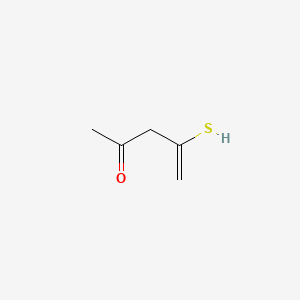

In [38]:
from urllib.request import urlretrieve
from IPython.display import Image  

smiles = 'CC(=O)CC(S)=C'
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

<h4> | PubChem | - name of a molecule


In [49]:
from urllib.request import urlopen
from lxml import etree

molecule = "aspirin"
query = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{molecule}/XML"

response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)

In [57]:
tags = list({elem.tag for elem in tree.iter()}) #all tags available
print(tags)

['{http://www.ncbi.nlm.nih.gov}PC-Count_atom-chiral-undef', '{http://www.ncbi.nlm.nih.gov}PC-Urn', '{http://www.ncbi.nlm.nih.gov}PC-Coordinates_aid_E', '{http://www.ncbi.nlm.nih.gov}PC-Conformer', '{http://www.ncbi.nlm.nih.gov}PC-Bonds_aid1_E', '{http://www.ncbi.nlm.nih.gov}PC-Urn_software', '{http://www.ncbi.nlm.nih.gov}PC-Compound_charge', '{http://www.ncbi.nlm.nih.gov}PC-InfoData_value_sval', '{http://www.ncbi.nlm.nih.gov}PC-DrawAnnotations_aid1', '{http://www.ncbi.nlm.nih.gov}PC-CompoundType_id_cid', '{http://www.ncbi.nlm.nih.gov}PC-Coordinates_conformers', '{http://www.ncbi.nlm.nih.gov}PC-Bonds_order', '{http://www.ncbi.nlm.nih.gov}PC-Count_isotope-atom', '{http://www.ncbi.nlm.nih.gov}PC-Urn_name', '{http://www.ncbi.nlm.nih.gov}PC-Count', '{http://www.ncbi.nlm.nih.gov}PC-BondType', '{http://www.ncbi.nlm.nih.gov}PC-Count_covalent-unit', '{http://www.ncbi.nlm.nih.gov}PC-Element', '{http://www.ncbi.nlm.nih.gov}PC-Conformer_x', '{http://www.ncbi.nlm.nih.gov}PC-Urn_version', '{http://w

In [64]:
sek = []
for element in tree.iter():
    if element.tag == "{http://www.ncbi.nlm.nih.gov}PC-InfoData_value_sval": #there is a SMILES format
        sek.append(element.text)

In [52]:
print(sek)

['2-acetoxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetoxybenzoic acid', 'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)', 'BSYNRYMUTXBXSQ-UHFFFAOYSA-N', '180.04225873', 'C9H8O4', '180.16', 'CC(=O)OC1=CC=CC=C1C(=O)O', 'CC(=O)OC1=CC=CC=C1C(=O)O', '180.04225873']


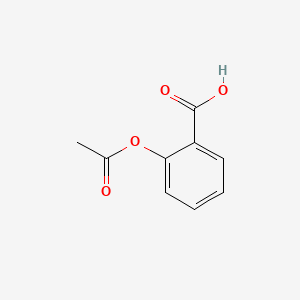

In [53]:
from urllib.request import urlretrieve
from IPython.display import Image


smiles = sek[-2] #aspirin molecule in SMILES format
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

<h4> Exercise5: Download SMILES format and plot "chlordiazepoxide" structure. What is the application of such a molecule?
 

<h4> | PubChem | - Synonyms

In [28]:
from urllib.request import urlopen
from lxml import etree


molecule = "aspirin"

query = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{molecule}/synonyms/XML"
response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)

synonyms = []
for elem in tree.iter():
    if elem.tag == "{http://pubchem.ncbi.nlm.nih.gov/pug_rest}Synonym":
        synonyms.append(elem.text)
        
print(synonyms[:10]) #the first 10 synonyms

['aspirin', 'ACETYLSALICYLIC ACID', '50-78-2', '2-Acetoxybenzoic acid', '2-(Acetyloxy)benzoic acid', 'O-Acetylsalicylic acid', 'o-Acetoxybenzoic acid', 'Acylpyrin', 'Easprin', 'Ecotrin']


<h3> Regular expression library - more elastic strings processing

    [abc] <-- a or b or c
    [a-z] <-- from a to z
    [A-Z] <-- from A to Z
    [^X] <-- everything except X
    . <-- everything
    \d <-- a digit
    \D <-- everything except a digit [^d]
    \s <-- space
    \S <-- everything except a space
    \w <-- a-z, A-z, digit, underline _
    * <-- no occurence, one occurence or more than one occurence, for example AG*T means AT or AGT or AGGT or AGGGT ....
    + <-- one or more occurence, for example AG+T means AGT, AGGT, AGGGT,...
    ? <-- no occurence or one occurence, for example AG?T means AT or AGT
    {n} <-- sth occurs n-times 
    {n,m} <-- the number of occurences is between n and m, for example AG{2,3}T means AGGT or AGGGT
    (X|Y) <-- X or Y
    ^X <-- text starts with X
    X$ <-- text ends with X

<h4> Exercise6: Explain the following patterns and give example strings that match them:
    <br>
        
- AT*C
- AT+C
- AT?C
- AT{3}C
- AT{2,8}C
- A.*C
- A.+C
- A.?C
- A.{3}C
- A.{2,8}C
- A[GC]T
- A[^G]T
- ^A[GC]T$
- ^A[^\s]+

<h4> Exercise7: Write a regular expression that encompasses the following words:
        <br>
        
- ATA, AGA, ACA
- AT, ACT, ACCT, ACCCCT
- TAC, TCC, TCAAC, TCAACC

In [101]:
import regex as re #library for regular expressions

In [104]:
#Example: find all occurences:

t = "He rested his head on his hand"
pattern = r'h..d'
print(re.findall(pattern, t)) #findall has two arguments --> pattern and text

['head', 'hand']


In [105]:
#Example: substitute all occurences/similar to replace but more powerful

t = "He rested his head on his hand"
pattern = r'h..d'
print(re.sub(pattern, 'X', t)) #sub has three arugments: pattern, to what we change the pattern, and text

He rested his X on his X


<h4> Exercise8: Using regex find all non-overlapping subsequences composed of only C residues. For example, after application to ACTCCGCCCC you should obtain ['C','CC','CCC'].

<h4> Exercise9: Using regex, remove all low characters from a sequence. For example, after application to ATTAAAaaaGccT you should obtain ATTAAAT. 

Opening the FASTA files using re.

In [83]:
f = open("sequences2")
t = f.read()
f.close()

seqs = re.findall("(>.*)\n([A-Zn\n]*)", t) 
print(seqs)

seqs = [(elem[0],elem[1].replace("\n","")) for elem in seqs] #remove "\n" characters from sequences
print(seqs)

[('>s1', 'ATCGA\nATGCG\nAA\n'), ('>s2', 'TCGCG\nTAGGC\nAGC')]
[('>s1', 'ATCGAATGCGAA'), ('>s2', 'TCGCGTAGGCAGC')]


From sequence comparisons and crystallographic data analysis it has been shown that an appreciable proportion of proteins that bind ATP or GTP share a number of more or less conserved sequence motifs. The best conserved of these motifs is a glycine-rich region, which typically forms a flexible loop between a β-strand and an α-helix. This loop interacts with one of the phosphate groups of the nucleotide.

<h4> Exercise10: Consider the motif | A or G | ? | ? | ? | ? | G | K | S or T |.  
    
- Write a regular expression for the motif.
- Download sequences AAH10041.2 and CAG38727.1 (from NCBI/proteins, automatically).
- What are the names of these proteins? 
- Localize the motif fragments within these proteins (positions).
- Compare the results with UNIPROT database data (Features).

<h3> Supplementary materials (not obliagory for the exam)

<h4> Small world phenomenom

<img src="graphs.png" height=10> 

<h3> Graphs - basics

In [2]:
import networkx as nx

DG = nx.DiGraph() #create a directed graph

In [3]:
DG.add_node("A") #add a single node

In [4]:
DG.add_nodes_from(["B", "C", "D"]) #add multiple nodes

In [5]:
DG.nodes() #view present nodes

NodeView(('A', 'B', 'C', 'D'))

In [6]:
DG.add_edges_from([("A","B"),("B", "A"),("C","D"),("A","D")]) #add a group of edge connections 

In [7]:
DG.edges() #view present edges

OutEdgeView([('A', 'B'), ('A', 'D'), ('B', 'A'), ('C', 'D')])

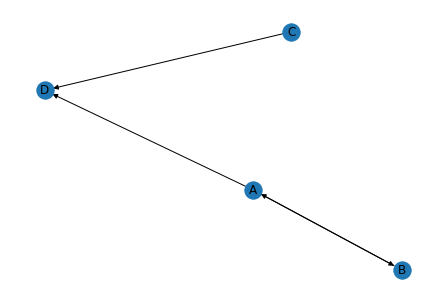

In [8]:
nx.draw(DG, with_labels=True) #plot graph

<h3> C. elegans - connectome analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [9]:
nodes_labels = pd.read_csv("labels.csv", header=None) #names of neurons (labels)
adjacency = pd.read_csv("matrix.csv", header=None) #which neurons are connected?
locations = pd.read_csv("positions.csv", header=None) #coordinates

In [10]:
#add labels
adjacency.index = nodes_labels[0] 
adjacency.columns = nodes_labels[0]
locations.index = nodes_labels[0]

In [11]:
adjacency.head()

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADAR,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADEL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADFL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


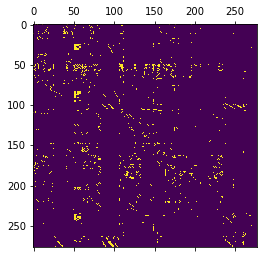

In [12]:
plt.matshow(adjacency)
plt.show()

In [13]:
in_degree = adjacency.sum(axis=0)
print(in_degree[:5])

0
ADAL     9
ADAR     8
ADEL    24
ADER    18
ADFL     7
dtype: int64


In [15]:
out_degree = adjacency.sum(axis=1)
print(out_degree[:5])

0
ADAL    6
ADAR    7
ADEL    5
ADER    6
ADFL    3
dtype: int64


Text(0, 0.5, 'frequency')

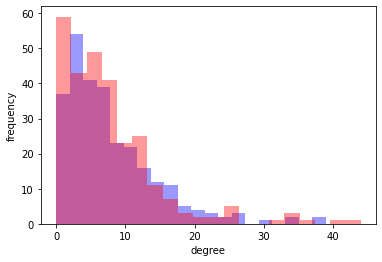

In [16]:
plt.hist(in_degree, alpha=0.4,bins=20, color= "blue") 
plt.hist(out_degree, alpha=0.4,bins=20, color = "red")
plt.xlabel("degree")
plt.ylabel("frequency")

In [17]:
locations.head()

,0,1
0,,
ADAL,0.011068,0.005903
ADAR,0.014206,0.002204
ADEL,0.016233,0.005657
ADER,0.014941,0.009308
ADFL,0.082393,-0.000984


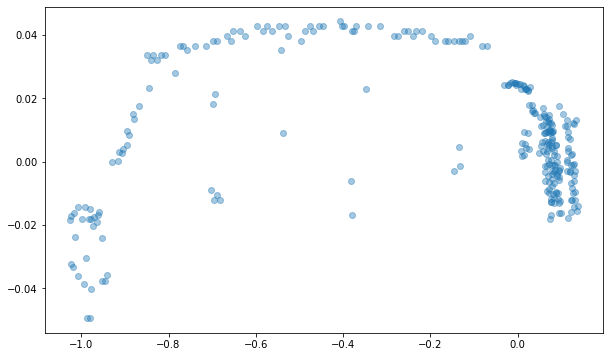

In [18]:
def PlotCoordinates():
    plt.figure(figsize=(10,6))
    plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)


PlotCoordinates()

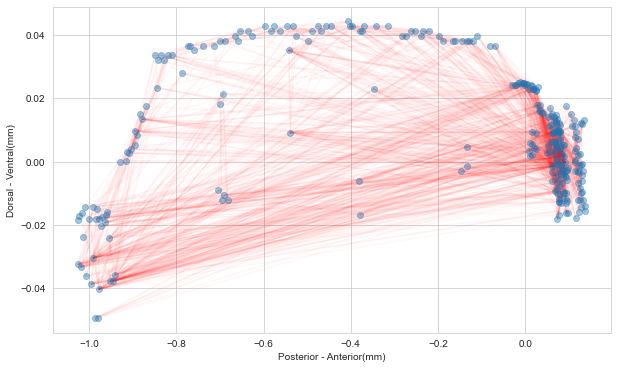

In [19]:
#Locations + connections

def PlotConnectome():
    import seaborn as sns
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,6))
    for i,row in enumerate(adjacency.values):
        for j,columns in enumerate(row):
            if columns == 1:
                xs = [locations.values[i,0],locations.values[j,0]]
                ys = [locations.values[i,1],locations.values[j,1]]
                plt.plot(xs,ys,color="red",alpha=0.03)
    plt.plot(locations.values[:,0],locations.values[:,1],"o",alpha=0.4)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Posterior - Anterior(mm)",fontsize=10)
    plt.ylabel("Dorsal - Ventral(mm)",fontsize=10)
    
PlotConnectome()

In [20]:
#calculate distances between neurons

inter_neuron_dist = pd.DataFrame(pairwise_distances(locations))
inter_neuron_dist.columns = nodes_labels[0]
inter_neuron_dist.index = nodes_labels[0]

In [21]:
inter_neuron_dist.head()

,ADAL,ADAR,ADEL,ADER,ADFL,ADFR,ADLL,ADLR,AFDL,AFDR,...,VD12,VD13,VD2,VD3,VD4,VD5,VD6,VD7,VD8,VD9
0,,,,,,,,,,,,,,,,,,,,,
ADAL,0.000000,0.004850,0.005171,0.005157,0.071657,0.072781,0.074034,0.074281,0.075752,0.075708,...,0.879595,0.925826,0.045768,0.148903,0.233522,0.327535,0.418788,0.500684,0.608913,0.700111
ADAR,0.004850,0.000000,0.004004,0.007141,0.068261,0.069283,0.070109,0.070422,0.072290,0.072327,...,0.882789,0.928948,0.050171,0.152795,0.237204,0.331086,0.422265,0.504087,0.612279,0.703425
ADEL,0.005171,0.004004,0.000000,0.003873,0.066492,0.067626,0.068987,0.069209,0.070593,0.070543,...,0.884763,0.930989,0.050632,0.154001,0.238665,0.332695,0.423954,0.505854,0.614083,0.705282
ADER,0.005157,0.007141,0.003873,0.000000,0.068233,0.069470,0.071290,0.071439,0.072392,0.072258,...,0.883429,0.929726,0.048178,0.152003,0.236869,0.331023,0.422350,0.504321,0.612584,0.703832
ADFL,0.071657,0.068261,0.066492,0.068233,0.000000,0.002372,0.012054,0.010565,0.004296,0.004070,...,0.951023,0.997134,0.116032,0.220199,0.305094,0.399184,0.490444,0.572320,0.680529,0.771686


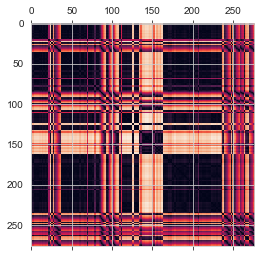

In [54]:
plt.matshow(inter_neuron_dist)
plt.show()

In [22]:
link_list=[]
for row in adjacency.index:
    for col in adjacency.columns:
        if adjacency.loc[row,col]!=0:
            link_list.append([row,col, inter_neuron_dist.loc[row,col]])

In [23]:
len(link_list)

2105

In [24]:
link_list[:5] #five first elements

[['ADAL', 'ADEL', 0.005170850201852695],
 ['ADAL', 'ADFL', 0.07165668764714148],
 ['ADAL', 'AIAL', 0.05421844885175156],
 ['ADAL', 'AWAL', 0.06748139937523523],
 ['ADAL', 'PVPL', 0.9068058069222097]]

In [25]:
#the same but this tame as a dataframe

df = pd.DataFrame(link_list, columns=["input", "output", "weight"])
df.head()

,input,output,weight
0,ADAL,ADEL,0.005171
1,ADAL,ADFL,0.071657
2,ADAL,AIAL,0.054218
3,ADAL,AWAL,0.067481
4,ADAL,PVPL,0.906806


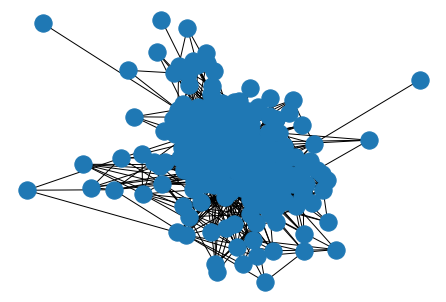

In [26]:
#draw graphs

import networkx as nx
g = nx.from_pandas_edgelist(df, "input", "output", "weight")
nx.draw(g)

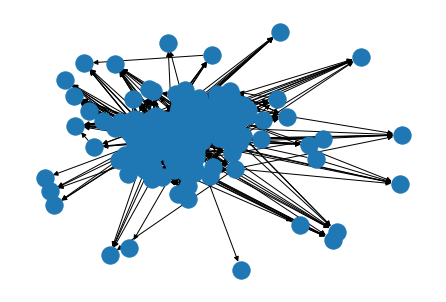

In [27]:
g2 = nx.from_pandas_edgelist(df, "input", "output", "weight", create_using=nx.DiGraph()) #other visualisation
nx.draw(g2)

In [28]:
print(list(g2.nodes())[:10])

['ADAL', 'ADEL', 'ADFL', 'AIAL', 'AWAL', 'PVPL', 'RMGL', 'ADAR', 'ADER', 'ADFR']


In [29]:
print(list(g2.edges())[:10])

[('ADAL', 'ADEL'), ('ADAL', 'ADFL'), ('ADAL', 'AIAL'), ('ADAL', 'AWAL'), ('ADAL', 'PVPL'), ('ADAL', 'RMGL'), ('ADEL', 'ADER'), ('ADEL', 'BDUL'), ('ADEL', 'BDUR'), ('ADEL', 'FLPL')]


In [30]:
list(g2.neighbors("ADAL")) 

['ADEL', 'ADFL', 'AIAL', 'AWAL', 'PVPL', 'RMGL']

In [31]:
g2.get_edge_data("ADAL", "ADFL")

{'weight': 0.07165668764714148}

<h4> Rich club coefficient: $\phi(k) = \frac{2|E_k|}{|V_k|(|V_k|-1)}$, where $|V_k|$ is the number of nodes with degree at least k and $|E_k|$ is a number of edges between them.

<img src="richc.png" width = 500> 

The rich-club concept has been introduced in order to characterize the presence of a cohort of 
nodes with a large number of links (rich nodes) that tend to be well connected between each 
other, creating a tight group (club). Rich-clubness defines the extent to which a network 
displays a topological organization characterized by the presence of a node rich-club.

For each degree k, the rich-club coefficient is the ratio of the number of actual to the number of potential edges for nodes with degree greater than k:

https://www.sciencedirect.com/science/article/pii/S2001037020303287 worth reading

In [36]:
from networkx.algorithms import rich_club_coefficient
rcc = rich_club_coefficient(g2.to_undirected(),normalized=True)
rcc = pd.Series(rcc)

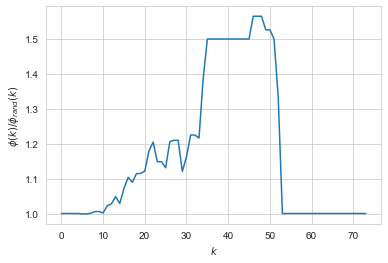

In [37]:
plt.plot(rcc)
plt.xlabel("$k$")
plt.ylabel("$\phi(k)/\phi_{rand}(k)$")
plt.show()

In [38]:
rcc[rcc>1.2]

22    1.204545
26    1.205882
27    1.209677
28    1.209677
31    1.225000
32    1.225000
33    1.216216
34    1.387097
35    1.500000
36    1.500000
37    1.500000
38    1.500000
39    1.500000
40    1.500000
41    1.500000
42    1.500000
43    1.500000
44    1.500000
45    1.500000
46    1.565217
47    1.565217
48    1.565217
49    1.526316
50    1.526316
51    1.500000
52    1.333333
dtype: float64

In [39]:
undirected_degrees = pd.Series(dict(g.degree()))
rich_club = list(undirected_degrees[undirected_degrees>35].index)
perif = list(set(g.nodes).difference(rich_club))
g_rich = g.subgraph(rich_club)
g_perif = g.subgraph(perif)

In [40]:
print(rich_club)

['AVAR', 'AVAL', 'DVA', 'PVCR', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'PVCL']


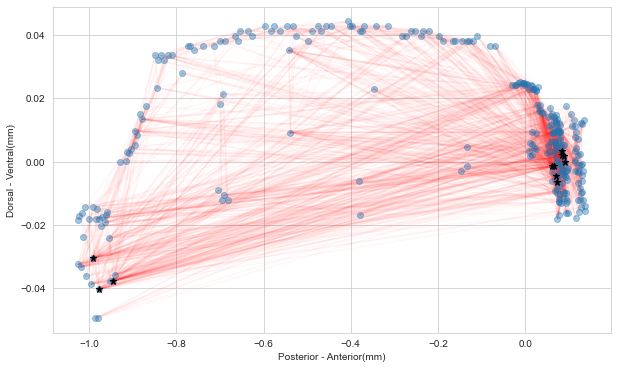

In [41]:
rich_neurons_locations = locations.loc[rich_club]
PlotConnectome()
plt.plot(rich_neurons_locations[0],rich_neurons_locations[1],"*k",markersize=7)
plt.show()

<h4> Graph traversal - searching through a network for particular nodes or certain paths

In [42]:
shortest_path = nx.shortest_path(g, 'ADAL', 'VD8')

print(shortest_path)

['ADAL', 'AVAR', 'DA6', 'VD8']


In [43]:
path = '-'.join(shortest_path) #joining a list of strings into one long string and add '-' symbol between subsequent elements
print(path)

ADAL-AVAR-DA6-VD8
